In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm; tqdm.pandas()
pd.options.display.max_columns = 202
pd.options.display.max_rows = 300

In [3]:
train = pd.read_pickle('data/train_original.pkl')
test = pd.read_pickle('data/test_original.pkl')
special_cols = [col for col in train.columns if train[col].dtype != np.float64]
feature_cols = [col for col in train.columns if col not in special_cols]

In [4]:
def plot_target_val_list_loc(df, target_val_list):
    filt = None 
    possible_cols = None 
    
    for tv in tqdm(target_val_list):
        tmp_filt = df[feature_cols].apply(lambda row: tv in row.values ,axis=1)
        tmp_p_cols = [c for c in feature_cols if tv in train[c].values]
        
        if filt is None:
            filt = tmp_filt
            possible_cols = tmp_p_cols
        else:
            filt = filt | tmp_filt
            possible_cols += tmp_p_cols
            
            
    possible_cols = list(set(possible_cols))
    print(filt.sum(), len(possible_cols))
    
    fig = plt.figure(figsize=(100, 500))
    #fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    values = df.loc[filt, possible_cols+['target']].values
    all_filt = None
    for tv in tqdm(target_val_list):
        if all_filt is None:
            all_filt = (values==tv) | (values==1)
        else:
            all_filt = all_filt | (values==tv)
        
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(all_filt)

100%|████████████████████████████████████████████████████████████████████████████| 451/451 [00:41<00:00, 11.52it/s]


5000 157


100%|██████████████████████████████████████████████████████████████████████████| 451/451 [00:00<00:00, 1209.12it/s]


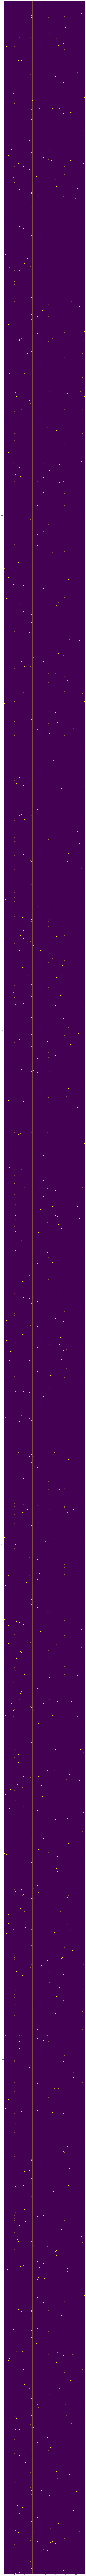

In [5]:
plot_target_val_list_loc(train.iloc[:5000], train['var_68'].unique())

In [7]:
target_vals = train['var_68'].unique()
filt = train[feature_cols].progress_apply(lambda row: (row.isin(target_vals)).sum()>1 ,axis=1)
filt.sum()

100%|████████████████████████████████████████████████████████████████████| 200000/200000 [00:57<00:00, 3502.41it/s]


67926

In [9]:
target_vals = train['var_68'].unique()
filt = train[feature_cols].progress_apply(lambda row: (row.isin(target_vals)).sum() ,axis=1)
filt.sum()

100%|████████████████████████████████████████████████████████████████████| 200000/200000 [00:58<00:00, 3422.25it/s]


282563

In [11]:
train['in_var_68_cnt']=filt
train[['in_var_68_cnt','target']].corr('spearman')

,in_var_68_cnt,target
in_var_68_cnt,1.000000,0.002965
target,0.002965,1.000000


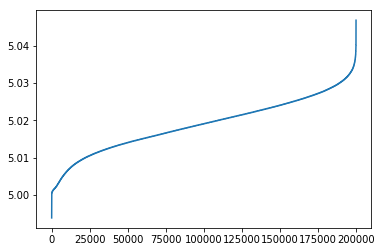

In [15]:
plt.plot(train['var_68'].sort_values().reset_index(drop=True))

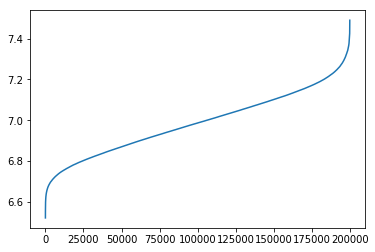

In [16]:
plt.plot(train['var_91'].sort_values().reset_index(drop=True))

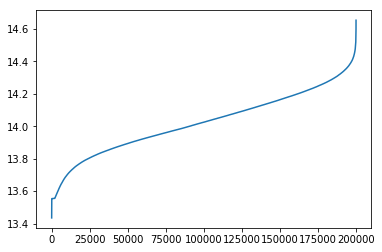

In [17]:
plt.plot(train['var_12'].sort_values().reset_index(drop=True))

In [18]:
train[feature_cols].describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0000

In [19]:
test[feature_cols].describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000

In [20]:
train.loc[train.target==0, feature_cols].describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.00000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.000000,179902.00000

In [21]:
train.loc[train.target==1, feature_cols].describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.00000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.00

In [48]:
all_df = pd.concat([train[feature_cols], test[feature_cols]], axis=0).reset_index(drop=True)
all_values = all_df.values.flatten()

In [49]:
fracs, ints = np.modf(all_values)

In [50]:
len(feature_cols)*train.shape[0]+len(feature_cols)*test.shape[0]

80000000

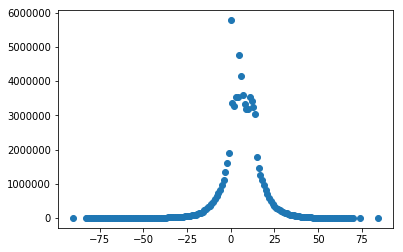

In [51]:
vc = pd.Series(ints).value_counts()
plt.scatter(vc.index, vc.values); plt.show()

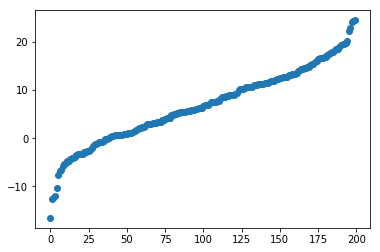

In [52]:
df = train[feature_cols].describe()
vals = df.loc['mean',].values
vals = sorted(vals)
plt.scatter(np.arange(200), vals); plt.show()

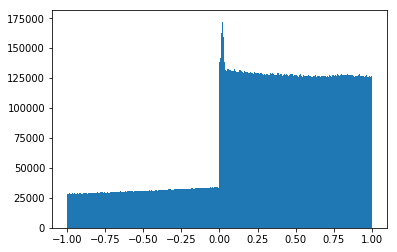

In [53]:
plt.hist(fracs, bins=1000); plt.show()

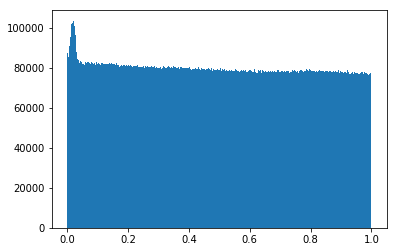

In [54]:
fracs[fracs<0] = fracs[fracs<0]*(-1)
plt.hist(fracs, bins=1000); plt.show()

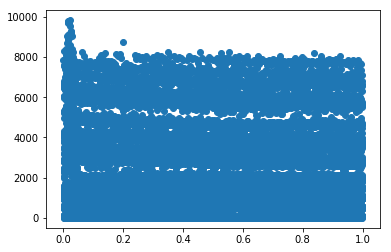

42726

In [55]:
vc = pd.Series(fracs).value_counts()
plt.scatter(vc.index, vc.values); plt.show()
len(vc)

In [56]:
vc.loc[[0.021, 0.1111]]

0.0210    617
0.1111    603
dtype: int64

In [57]:
np.set_printoptions(100)

In [58]:
special_frac = [v for v in vc.index if len(str(v)) > 6]
vc.loc[special_frac], len(special_frac)

(0.0229    9827
 0.0152    9800
 0.0198    9798
 0.0137    9762
 0.0183    9705
 0.0168    9670
 0.0213    9547
 0.0259    9306
 0.0244    9228
 0.0243    9157
 0.0199    9153
 0.0228    9152
 0.0214    9105
 0.0167    9095
 0.0274    9046
 0.0122    9029
 0.0182    8921
 0.0153    8878
 0.0138    8824
 0.0107    8679
 0.0175    8608
 0.0221    8602
 0.0091    8416
 0.0197    8403
 0.0191    8393
 0.0212    8388
 0.0275    8381
 0.0145    8377
 0.0061    8297
 0.0015    8288
 0.0076    8273
 0.0215    8272
 0.0305    8270
 0.0206    8262
 0.0200    8258
 0.0154    8236
 0.0236    8225
 0.0169    8220
 0.0289    8216
 0.0121    8211
 0.0184    8201
 0.0252    8174
 0.0242    8111
 0.0245    8110
 0.0092    8090
 0.0106    8077
 0.0227    8070
 0.0205    8059
 0.0260    8055
 0.0166    8020
 0.0130    7995
 0.0335    7991
 0.0267    7977
 0.0139    7927
 0.0046    7918
 0.0151    7870
 0.0190    7860
 0.1601    7816
 0.0077    7816
 0.0762    7813
 0.1402    7798
 0.0381    7794
 0.0136 

In [59]:
special_frac

[0.02289999999999992,
 0.015200000000000102,
 0.01980000000000004,
 0.013700000000000045,
 0.018299999999999983,
 0.016799999999999926,
 0.021300000000000097,
 0.025900000000000034,
 0.024399999999999977,
 0.02430000000000021,
 0.019899999999999807,
 0.022800000000000153,
 0.021399999999999864,
 0.01670000000000016,
 0.02740000000000009,
 0.012199999999999989,
 0.018200000000000216,
 0.01529999999999987,
 0.013799999999999812,
 0.010699999999999932,
 0.01750000000000007,
 0.02210000000000001,
 0.009100000000000108,
 0.019700000000000273,
 0.019099999999999895,
 0.02120000000000033,
 0.027499999999999858,
 0.014499999999999957,
 0.006099999999999994,
 0.0015000000000000568,
 0.007600000000000051,
 0.02149999999999963,
 0.03049999999999997,
 0.02059999999999995,
 0.019999999999999574,
 0.015399999999999636,
 0.023600000000000065,
 0.016899999999999693,
 0.028900000000000148,
 0.012100000000000222,
 0.01839999999999975,
 0.02519999999999989,
 0.024200000000000443,
 0.024499999999999744,
 

In [60]:
trn_values = train[feature_cols].values.flatten()
trn_targets = np.array([[v]*len(feature_cols) for v in train.target]).flatten()

trn_fracs, trn_ints = np.modf(trn_values)

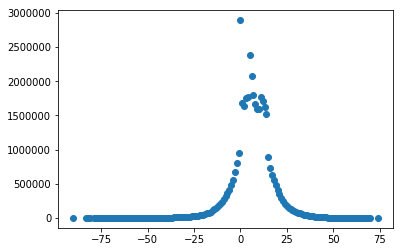

In [61]:
vc = pd.Series(trn_ints).value_counts()
plt.scatter(vc.index, vc.values); plt.show()

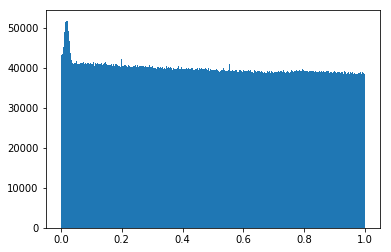

In [62]:
trn_fracs[trn_fracs<0] = trn_fracs[trn_fracs<0]*(-1)
plt.hist(trn_fracs, bins=1000); plt.show()

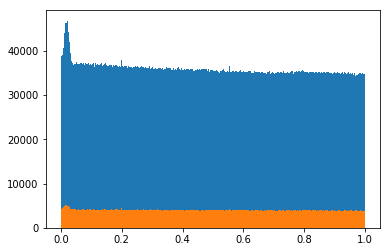

In [63]:
filt0 = trn_targets==0
filt1 = trn_targets==1
plt.hist(trn_fracs[filt0], bins=1000); 
plt.hist(trn_fracs[filt1], bins=1000); plt.show()

In [64]:
tmp = pd.DataFrame()
tmp['ints'] = trn_ints
tmp['fracs'] = trn_fracs
tmp['target'] = trn_targets
tmp['val'] = trn_values
d1 = tmp.groupby('ints')['target'].mean()#.sort_values(ascending=False)
d2 = tmp.groupby('fracs')['target'].mean()#.sort_values(ascending=False)
d3 = tmp.groupby('val')['target'].mean()
d4 = tmp.groupby('val')['target'].count()

In [65]:
pd.Series(trn_values).nunique()

828834

159


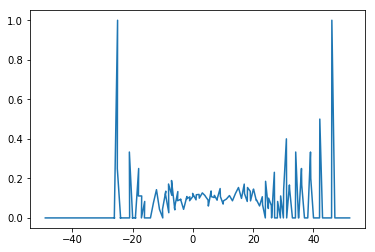

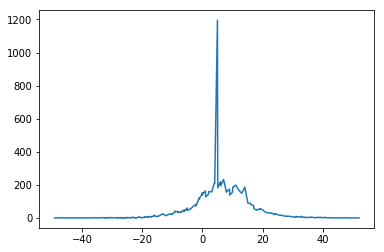

In [66]:
sp_vs = []
for i in range(-100, 100):
    if i <= 0 and i-0.021 in d3.index:
        sp_vs.append(i-0.021)
    if i <= 0 and i-0.1111 in d3.index:
        sp_vs.append(i-0.1111)  
    if i >= 0 and i+0.021 in d3.index:
        sp_vs.append(i+0.021)
    if i >= 0 and i+0.1111 in d3.index:
        sp_vs.append(i+0.1111)   
        
print(len(sp_vs))
plt.plot(d3.loc[sp_vs]); plt.show()
plt.plot(d4.loc[sp_vs]); plt.show()

In [67]:
d3.loc[[5.021, 5.1111]], d4.loc[[5.021, 5.1111]]

(val
 5.0210    0.090377
 5.1111    0.060109
 Name: target, dtype: float64, val
 5.0210    1195
 5.1111     183
 Name: target, dtype: int64)

In [70]:
res = []
for i in tqdm(np.arange(0, 1., 0.0001)):
    if i in fracs:
        res.append(i)

100%|████████████████████████████████████████████████████████████████████████| 10000/10000 [13:59<00:00, 11.91it/s]


In [71]:
len(res)

7798

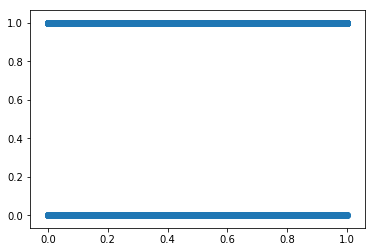

In [75]:
tmp = pd.Series(np.arange(0, 1., 0.0001))

plt.scatter(np.arange(0, 1., 0.0001),tmp.isin(res)); plt.show()

In [80]:
train_vals = train[feature_cols].values
train_vals = (train_vals-train_vals.min())/(train_vals.max()-train_vals.min())
plt.imsave('train_values.png', train_vals, cmap='magma')
train_vals.shape

(200000, 200)

In [81]:
train_cp = train[feature_cols].copy()
train_cp = train_cp.sort_values(feature_cols).reset_index(drop=True)
train_vals = train_cp.values
train_vals = (train_vals-train_vals.min())/(train_vals.max()-train_vals.min())
plt.imsave('train_values_sorted.png', train_vals, cmap='magma')
train_vals.shape

(200000, 200)

In [84]:
plt.imsave('train_values_sorted_1000.png', train_vals[:1000], cmap='magma')

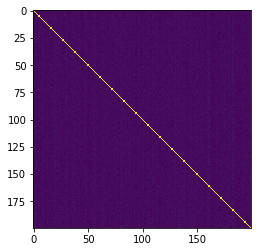

In [87]:
import seaborn as sns
train_cp = train[feature_cols].copy()
corr = train_cp.iloc[:10000,].corr('spearman')
corr = (corr-corr.min())/(corr.max()-corr.min())
plt.imshow(corr)